In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text

import nfl_data_py as nfl

In [2]:
# Turn off max columns for pandas DataFrame
pd.set_option('display.max_columns', None)

In [3]:
years = range(1999, 2023)

In [4]:
data = nfl.import_pbp_data(years, cache=True, alt_path="../cache")

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [5]:
df = data[['season', 'pass_location', 'epa']]

In [6]:
# Group by season and pass location, add count and mean epa, rename columns
df = df.groupby(['season', 'pass_location']).agg({'epa': ['count', 'mean']}).reset_index()
df.columns = ['season', 'pass_location', 'count', 'mean_epa']

In [7]:
# Keep only passes in the middle of the field
df = df[df['pass_location'] == 'middle']

In [8]:
df

,season,pass_location,count,mean_epa
1,1999,middle,57,0.217025
4,2000,middle,4,-1.361471
9,2002,middle,4,-1.113799
11,2003,middle,3,0.720866
14,2004,middle,3,0.557113
16,2005,middle,3,1.433804
18,2006,middle,3940,0.246342
21,2007,middle,4283,0.228772
24,2008,middle,4201,0.203586
27,2009,middle,4194,0.240263


In [10]:
# only keep data from 2006 and on
df = df[df['season'] >= 2006]

In [12]:
df

,season,pass_location,count,mean_epa
18,2006,middle,3940,0.246342
21,2007,middle,4283,0.228772
24,2008,middle,4201,0.203586
27,2009,middle,4194,0.240263
30,2010,middle,4174,0.238755
33,2011,middle,4481,0.255978
36,2012,middle,4453,0.260701
39,2013,middle,4472,0.267005
42,2014,middle,4203,0.269568
45,2015,middle,4358,0.294539


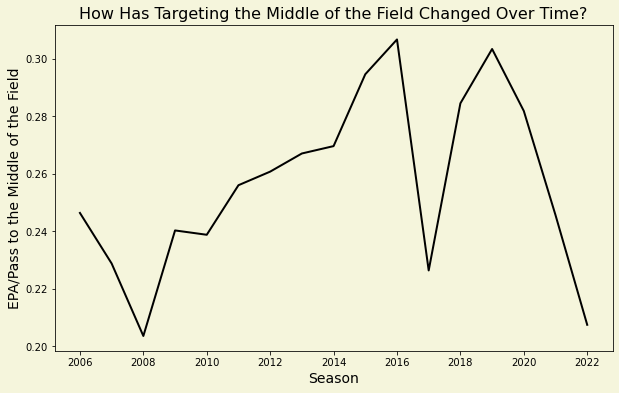

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sorting by season to ensure line is drawn in chronological order
df = df.sort_values('season')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create line chart
ax.plot(df['season'], df['mean_epa'], color='black',
        linewidth=2, label='mean_epa')

# Set the background color to beige
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Set labels, title and legend
ax.set_title('How Has Targeting the Middle of the Field Changed Over Time?', fontsize=16)
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('EPA/Pass to the Middle of the Field', fontsize=14)

# Save the plot as a high-quality image
plt.savefig('../images/middleoffield.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()
